<h1># Ridge Regularization</h1>

<h3>=> Sklearn </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
X=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=0.2)

<h3>-> Linear Regression.</h3>

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score =",r2_score(y_test,y_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score = 0.5188113124539249
RMSE = 48.72713760953252


<h3>-> Ridge Regression.</h3>

In [13]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)  #Alpha is nothing but lambda.

In [14]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [16]:
y_pred1=R.predict(X_test)
print("R2 score =",r2_score(y_test,y_pred1))
print("RMSE =",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score = 0.518973263588496
RMSE = 48.71893700181951


<h3>->Ridge implementation manually for 2D data.</h3>

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=1)

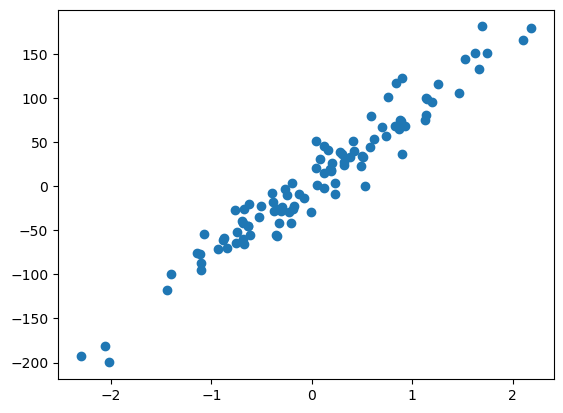

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[82.48449929]
4.054028777621712


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[73.14840907]
4.619635750530832


In [12]:
class MyRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,X_train,y_train):
        num=den=0
        for i in range(X_train.shape[0]):
            num = num + ((y_train[i]-y_train.mean())*(X_train[i]-X_train.mean()))
            den = den + ((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-self.m*X_train.mean()
        print(self.m)
        print(self.b)

    def predict(self,X_test):
        pass

In [13]:
rr1=MyRidge(alpha=10)
rr1.fit(X,y)

[73.14840907]
[4.61963575]


<h3>->Ridge for n-D data</h3>

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np
X,y=load_diabetes(return_X_y=True)

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.2)

In [3]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.1,solver='cholesky')

In [5]:
rr.fit(X_train,y_train)
y_pred=rr.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))
print(rr.intercept_)
print(rr.coef_)

r2 score = 0.46931288533098026
150.89053425602808
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


In [28]:
class MyRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None

    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        I= np.identity(X_train.shape[1])
        I[0][0]=0 # If we write this step will get exact answer as ridge class.
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.b = result[0]
        self.m = result[1:]

    def predict(self, X_test):
        return np.dot(X_test,self.m) + self.b


In [29]:
mr=MyRidge(alpha=0.1)

In [30]:
mr.fit(X_train,y_train)

In [31]:
y_pred=mr.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))
print(mr.b)
print(mr.m)

r2 score = 0.4693128853309806
150.89053425602813
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


<h3>-> Ridge using Gradient Descent</h3>

In [32]:
from sklearn.linear_model import SGDRegressor

In [35]:
sgd=SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [36]:
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))
print(sgd.coef_)
print(sgd.intercept_)

r2 score = 0.44225144095667523
[  48.97907436 -157.20158183  368.3254946   267.51545041   -5.77029452
  -56.96839409 -168.84354885  138.88017091  330.69324404   95.38115084]
[166.27944224]


In [37]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [38]:
rr.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))
print(rr.coef_)
print(rr.intercept_)

r2 score = 0.44225144095667523
[  34.52192778 -290.84083871  482.40181675  368.06786931 -852.44872818
  501.59160694  180.11115474  270.76334443  759.73534802   37.49135796]
151.101985182554


In [45]:
class MyRidgeGD:

    def __init__(self,epochs,learning_rate,alpha):

        self.learning_rate=learning_rate
        self.epochs=epochs
        self.alpha=alpha
        self.coef_=None
        self.intercept_=None

    def fit(self,X_train,y_train):

        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0

        thetha=np.insert(self.coef_,0,self.intercept_)
        X_train = np.insert(X_train,0,1,axis=1)

        for i in range(self.epochs):
            thetha_der=np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha * thetha
            thetha = thetha - self.learning_rate* thetha_der

        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]

    def predict(self, X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [46]:
reg=MyRidgeGD(epochs=500, learning_rate=0.005, alpha=0.001)

In [47]:
reg.fit(X_train,y_train)

In [48]:
y_pred = reg.predict(X_test)

print("r2 score =",r2_score(y_test,y_pred))
print("Coeff =",reg.coef_)
print("Intercept =",reg.intercept_)

r2 score = 0.4738018280260915
Coeff = [  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
Intercept = 150.8697531671347


<h1># Lasso Regularization(L1)</h1>

<h3>-> Sklearn Code</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[25.58396522]
-1.577685310597297


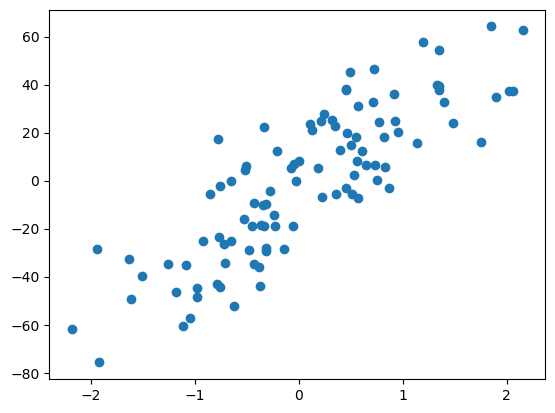

In [3]:
X,y= make_regression(n_samples=100, n_features=1 , n_informative=1 , n_targets=1 , noise=20 , random_state=13) 

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sahil sharma\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+04, tolerance: 6.335e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = c

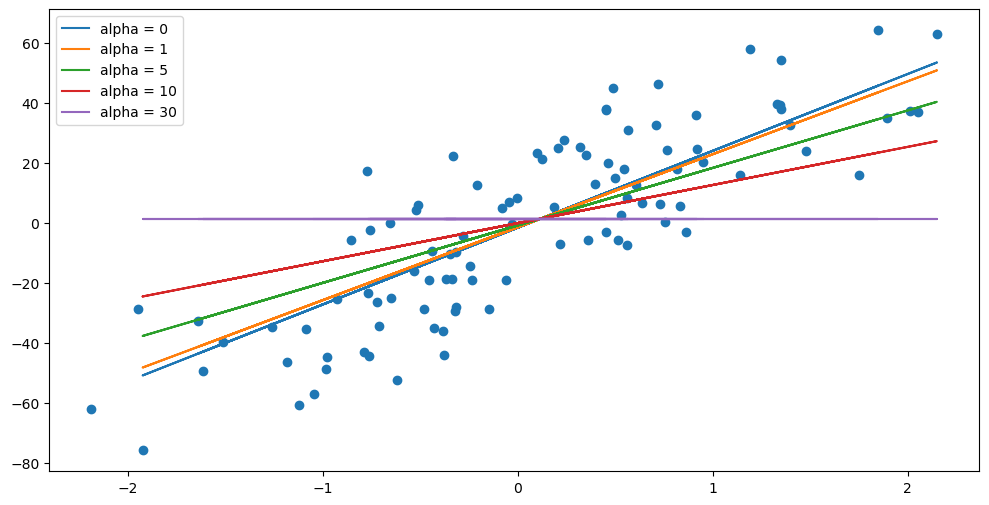

In [4]:
alphas= [0, 1, 5, 10, 30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    La = Lasso(alpha=i)
    La.fit(X_train , y_train)
    plt.plot(X_test, La.predict(X_test), label=f"alpha = {i}")
plt.legend()
plt.show()
#By below result we can say that in lasso at higher value of alpha slope(coeff) becomes zero.

<h1># ElasticNet Regression</h1>

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet,Ridge,Lasso,LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [6]:
X,y=load_diabetes(return_X_y=True)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
#LinearRegression.
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))

r2 score = 0.4399338661568968


In [9]:
#Ridge
rr=Ridge(alpha=0.1)
rr.fit(X_train,y_train)
y_pred=rr.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))

r2 score = 0.45199494197195456


In [10]:
#Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))

r2 score = 0.441118559631106


In [33]:
#ElasticNet
er=ElasticNet(alpha=0.005,l1_ratio=0.9)  #Ridge has higher prefrence then lasso
er.fit(X_train,y_train)
y_pred=er.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))

#Or

from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='elasticnet',max_iter=500,eta0=0.07,learning_rate='constant',alpha=0.001)
sgd.fit(X_train,y_train)
y_pred=sgd.predict(X_test)
print("r2 score =",r2_score(y_test,y_pred))

r2 score = 0.4531474541554822
r2 score = 0.44058963561012876
